<a href="https://colab.research.google.com/github/HBocaccio/NumLabIMC/blob/main/TPs/TP1/TP1IMC2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2024
# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 22 de octubre, inclusive**. El trabajo se puede hacer en **grupos de hasta 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2024_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.


In [ ]:
#Importamos bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import axes3d
import math

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.

1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?

1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para c=10.

1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?

1.5. Para c=10, elija 3 valores de $\rho$ que definan comportamientos del sistema cualitativamente distintos. Para cada uno de estos valores de $\rho$, estudie las soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?


## 1.1
Definimos una funcion para la sigmoidea

In [ ]:
def sigmoidea(x, ro, c) :
    y = -(ro+c*x)
    return 1/(1+np.e**y)

def S(x) :
    return sigmoidea(x, 1, 1)

## 1.2

La funcion se estira en el eje x.


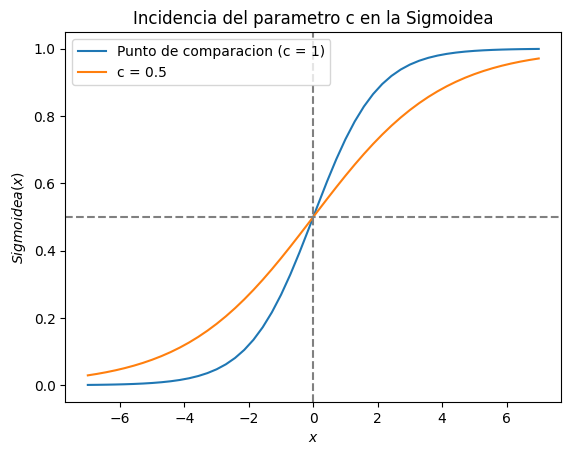

In [ ]:
x = np.linspace(-7,7,50)
y = sigmoidea (x, 0, 1)
plt.plot (x,y,label="Punto de comparacion (c = 1)")
# Establezco un punto de comparacion.

y = sigmoidea (x, 0, 0.5)
plt.plot (x,y, label = "c = 0.5")
plt.xlabel('$x$')
plt.ylabel('$Sigmoidea(x)$')
plt.legend()
plt.axvline(x=0, color = "grey", linestyle='--')
plt.axhline(y=0.5, color="grey", linestyle='--')
plt.title('Incidencia del parametro c en la Sigmoidea')
print("La funcion se estira en el eje x.")

La funcion se contrae en el eje x.


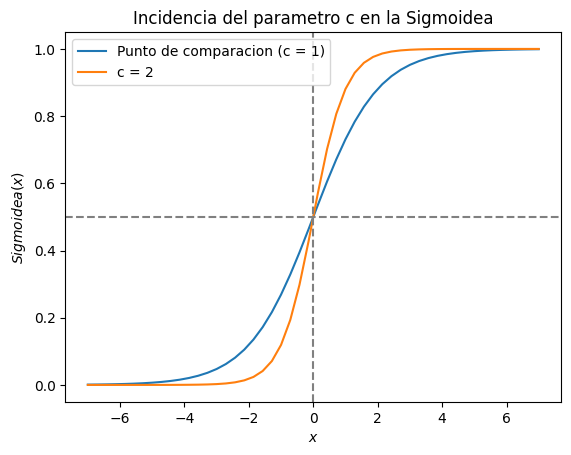

In [ ]:
x = np.linspace(-7,7,50)
y = sigmoidea (x, 0, 1)
plt.plot (x,y,label="Punto de comparacion (c = 1)")
# Establezco un punto de comparacion.

y = sigmoidea (x, 0, 2)
plt.plot (x,y, label = "c = 2")
plt.xlabel('$x$')
plt.ylabel('$Sigmoidea(x)$')
plt.legend()
plt.axvline(x=0, color = "grey", linestyle='--')
plt.axhline(y=0.5, color="grey", linestyle='--')
plt.title('Incidencia del parametro c en la Sigmoidea')
print("La funcion se contrae en el eje x.")

La funcion se invierte en el eje x.


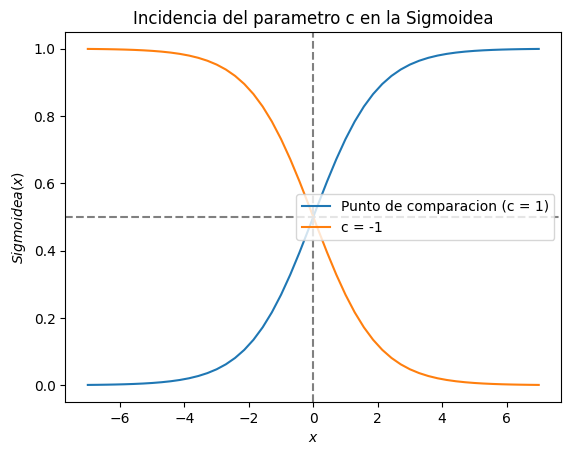

In [ ]:
x = np.linspace(-7,7,50)
y = sigmoidea (x, 0, 1)
plt.plot (x,y,label="Punto de comparacion (c = 1)")

y = sigmoidea (x, 0, -1)
plt.plot (x,y, label = "c = -1")
plt.xlabel('$x$')
plt.ylabel('$Sigmoidea(x)$')
plt.legend()
plt.axvline(x=0, color = "grey", linestyle='--')
plt.axhline(y=0.5, color="grey", linestyle='--')
plt.title('Incidencia del parametro c en la Sigmoidea')
print("La funcion se invierte en el eje x.")

La funcion se traslada en el eje x.


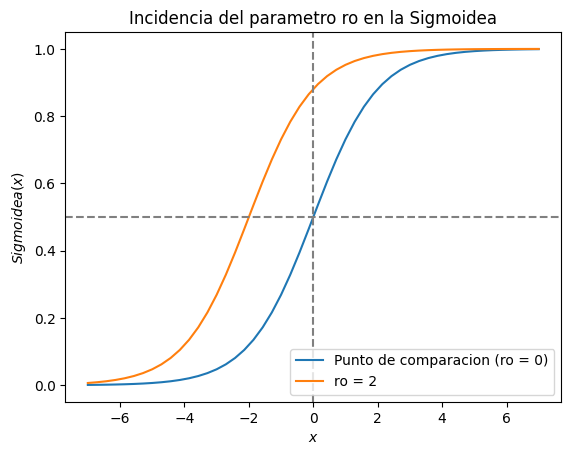

In [ ]:
x = np.linspace(-7,7,50)
y = sigmoidea (x, 0, 1)
plt.plot (x,y,label="Punto de comparacion (ro = 0)")

y = sigmoidea (x, 2, 1)
plt.plot (x,y, label = "ro = 2")
plt.xlabel('$x$')
plt.ylabel('$Sigmoidea(x)$')
plt.legend()
plt.axvline(x=0, color = "grey", linestyle='--')
plt.axhline(y=0.5, color="grey", linestyle='--')
plt.title('Incidencia del parametro ro en la Sigmoidea')
print("La funcion se traslada en el eje x.")

## 1.3
Para encontrar los puntos fijos del sistema vamos a buscar los puntos en los que el campo vector sea nulo, es decir, aquellos $x$ que cumplan:
$$ \dot{x} = x-S(\rho + cx)= 0 $$
o lo que es lo mismo:
$$ x = S(\rho + cx)$$

Por lo tanto, los puntos fijos seran aquellos en los que la funcion sigmoidea $S$ interseca a la funcion identidad del eje $x$.


1 punto fijo, esta entre 0.75 y 1.25


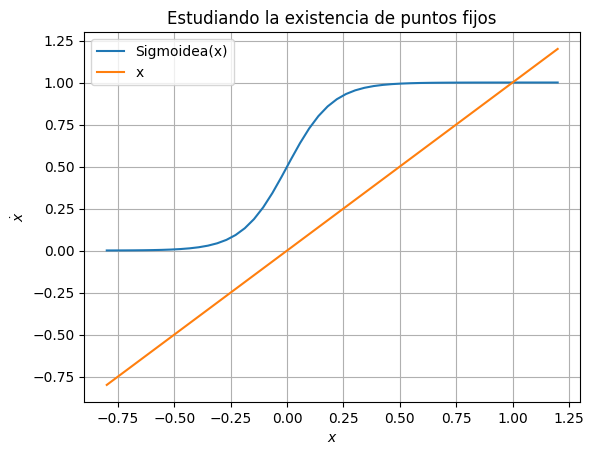

In [ ]:
x = np.linspace(-0.8, 1.2, 50)
y = sigmoidea(x, 0, 10)
plt.plot (x,y,label="Sigmoidea(x)")
plt.plot (x,x,label="x")
plt.xlabel('$x$')
plt.ylabel('${\dot{x}}$')
plt.legend()
plt.grid()
plt.title('Estudiando la existencia de puntos fijos')
print("1 punto fijo, esta entre 0.75 y 1.25")

Text(0.5, 1.0, 'Estudiando la existencia de puntos fijos')

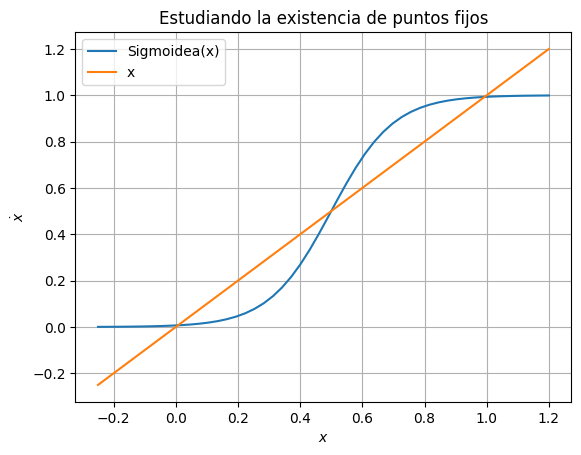

In [ ]:
x = np.linspace(-0.25, 1.2, 50)
y = sigmoidea (x, -5, 10)
plt.plot (x,y,label="Sigmoidea(x)")
plt.plot (x,x, label="x")
plt.xlabel('$x$')
plt.ylabel('${\dot{x}}$')
plt.legend()
plt.grid()
plt.title('Estudiando la existencia de puntos fijos')
# 3 punto fijos se ve que estan en los intervalos (-0.2, 0.2), (0.2, 0.6) y (0.8, 1.2).
# Se ve que hay un valor de ro entre 0 (es el valor que usé en el gráfico anterior) y -5 donde hay 2 puntos fijos.

# Graficamente se ve que en dicho ro el punto fijo extra aparece donde la sigmoidea tiene pendiente 1, puesto que f(x) = x tiene pendiente 1.
# Sigmoidea(x, ro, 10) = x no se puede despejar analiticamente para hallar ro(x) pero junto a la ecuacion de la sigmoidea derivada igualada a 1 el sistema de ecuaciones resultante
# si se puede despejar, quedando que dicho punto fijo es x' = 1/2 - np.sqrt(60)/20 (aproximadamente 0.113) y aparece en ro = np.log(10*x'*x') - 10*x' (aproximadamente -3.190).

Text(0.5, 1.0, 'Estudiando la existencia de puntos fijos')

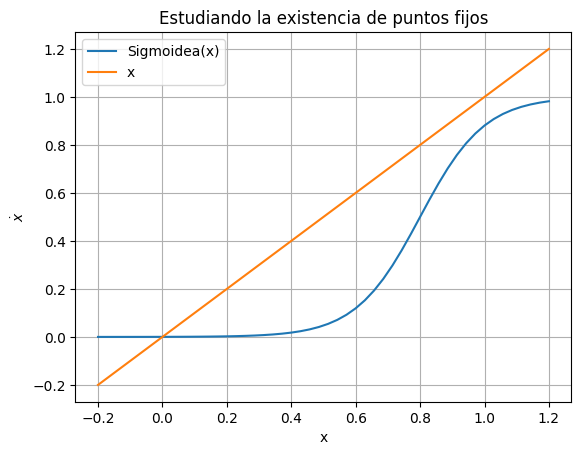

In [ ]:
x = np.linspace(-0.2, 1.2, 50)
y = sigmoidea (x, -8, 10)
plt.plot (x,y,label="Sigmoidea(x)")
plt.plot (x,x, label="x")
plt.xlabel('x')
plt.ylabel('${\dot{x}}$')
plt.legend()
plt.grid()
plt.title('Estudiando la existencia de puntos fijos')
# 1 punto fijo, esta entre -0.2 y 0.2
# Hay un valor de ro entre -8 y -4 (es el valor que usé en el gráfico anterior) donde hay 2 puntos fijos.

# De manera analoga a la que se uso para hallar el punto fijo extra anterior se puede averiguar analiticamente que
# x' = 1/2 + np.sqrt(60)/20 (aproximadamente 0.887) y aparece en ro = np.log(10*x'*x') - 10*x' (aproximadamente -6.809).

##1.4

In [ ]:
def biseccion (f, a, b, error) :
    intervalo = b-a
    while not(intervalo<error):
        c = (a+b)/2
        fa = f(a)
        fb = f(b)
        fc = f(c)
        if np.sign(fa)*np.sign(fc) < 0:
            a = a
            b = c
        if np.sign(fa)*np.sign(fc) > 0:
            a = c
            b = b
        intervalo = b-a
        if fa==0 :
            return a
        if fb==0 :
            return b
        if fc==0 :
            return c
    return (a, b)

def campo(x, ro) :
    return sigmoidea(x, ro, 10) - x

def estabilidad (f, x, y) :
    if (f(y)-f(x))/(y-x) > 0 :
        print ("Es un punto fijo inestable.")
    else :
        print ("Es un punto fijo estable.")

# Para los 2 casos con 1 punto fijo utilizo ro igual a 0 y -8.
# ro = 0 :
def y(x) :
    return campo(x,0)

intervalo = biseccion(y, 0.75, 1.25, 0.001)
print ("El intervalo en el que se encuentra la raiz es " + str((intervalo)))

# Calculo la estabilidad tomando a x como el minimo del intervalo que resulto de la biseccion y a x+h como el maximo:
estabilidad (y, intervalo[0], intervalo[1])

El intervalo en el que se encuentra la raiz es (0.9990234375, 1.0)
Es un punto fijo estable.


In [ ]:
# ro = -8 :
def y(x) :
    return campo(x,-8)

intervalo = biseccion(y, -0.2, 0.2, 0.001)
print ("El intervalo en el que se encuentra la raiz es " + str((intervalo)))

# Estabilidad:
estabilidad (y, intervalo[0], intervalo[1])

El intervalo en el que se encuentra la raiz es (0.0, 0.00078125)
Es un punto fijo estable.


In [ ]:

# Para el caso de 3 puntos fijos utilizo ro = -5 :
def y(x) :
    return campo(x,-5)

# Primer punto fijo:
intervalo = biseccion(y, -0.2, 0.2, 0.001)
print ("El intervalo en el que se encuentra el primer punto fijo es " + str((intervalo)))

# Estabilidad:
estabilidad (y, intervalo[0], intervalo[1])

# Segundo punto fijo:
# En este caso biseccion me dio la raiz exacta en vez de un intervalo, por eso quedo distinto, no queria agregar un if por si biseccion me da una tupla o un float.
punto_fijo = biseccion(y, 0.2, 0.6, 0.001)
print ("El segundo punto fijo es " + str((punto_fijo)))

# Estabilidad:
estabilidad (y, punto_fijo, punto_fijo + 0.001)

# Tercer punto fijo:
intervalo = biseccion(y, 0.8, 1.2, 0.001)
print ("El intervalo en el que se encuentra el tercer punto fijo es " + str((intervalo)))

# Estabilidad:
estabilidad (y, intervalo[0], intervalo[1])

El intervalo en el que se encuentra el primer punto fijo es (0.00703125, 0.0078125)
Es un punto fijo estable.
El segundo punto fijo es 0.5
Es un punto fijo inestable.
El intervalo en el que se encuentra el tercer punto fijo es (0.9921875, 0.99296875)
Es un punto fijo estable.


Las 2 bifurcaciones son nodo silla.
La linea punteada roja son los puntos fijos inestables, las lineas solidas son los estables.


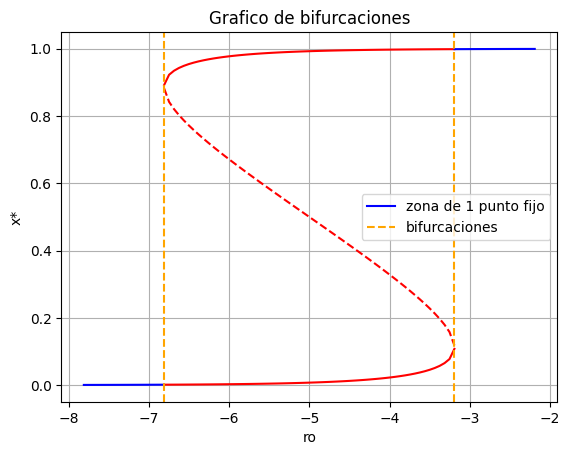

In [ ]:

# Diagrama de bifurcaciones:
# Procedo a hacer un barrido de ros:

# Bifurcacion 1.
x1 = 1/2 + np.sqrt(60)/20        # aproximadamente 0.887
ro1 = np.log(10*x1*x1) - 10*x1   # aproximadamente -6.809

# Bifurcacion 2.
x2 = 1/2 - np.sqrt(60)/20        # aproximadamente 0.113
ro2 = np.log(10*x2*x2) - 10*x2   # aproximadamente -3.190

# Excluyo a los ros de las bifurcaciones porque tienen 2 puntos fijos y ya los calcule a mano, por eso el 1/1000.
intervalo_ro1 = np.linspace (ro1-1, ro1-1/1000, 10)
puntos_fijos_1 = []

intervalo_ro2 = np.linspace (ro1+1/1000, ro2-1/1000, 60)
puntos_fijos_2_a = []
puntos_fijos_2_b = []
puntos_fijos_2_c = []
# 3 puntos fijos por ro en este rango, por eso 3 listas, en este caso biseccion va a encontrar un punto fijo distinto dependiendo del intervalo inicial en el que lo ejecutes.

intervalo_ro3 = np.linspace (ro2+1/1000, ro2+1, 10)
puntos_fijos_3 = []

# Defino biseccion de vuelta pero para que me retorne el promedio en vez del rango donde esta la raiz en una tupla.
def biseccion2 (f, a, b, error) :
    intervalo = b-a
    while not(intervalo<error):
        c = (a+b)/2
        fa = f(a)
        fb = f(b)
        fc = f(c)
        if np.sign(fa)*np.sign(fc) < 0:
            a = a
            b = c
        if np.sign(fa)*np.sign(fc) > 0:
            a = c
            b = b
        intervalo = b-a
        if fa==0 :
            return a
        if fb==0 :
            return b
        if fc==0 :
            return c
    return (a+b)/2

for ro in intervalo_ro1 :
    def y(x) :
        return campo(x,ro)
    puntos_fijos_1.append(biseccion2(y, -0.5, 0.5, 0.00001))

for ro in intervalo_ro3 :
    def y(x) :
        return campo(x,ro)
    puntos_fijos_3.append(biseccion2(y, 0.5, 1.5, 0.00001))

for ro in intervalo_ro2 :
    def y(x) :
        return campo(x,ro)
    puntos_fijos_2_a.append(biseccion2(y, puntos_fijos_1[9], x2, 0.00001))
    puntos_fijos_2_b.append(biseccion2(y, x2, x1, 0.00001))
    puntos_fijos_2_c.append(biseccion2(y, x1, puntos_fijos_3[0], 0.00001))

plt.plot (intervalo_ro2, puntos_fijos_2_a, color = "red")
plt.plot (intervalo_ro2, puntos_fijos_2_b, color = "red", linestyle='--')
plt.plot (intervalo_ro2, puntos_fijos_2_c, color = "red")
plt.plot (intervalo_ro1, puntos_fijos_1, label="zona de 1 punto fijo", color = "blue")
plt.plot (intervalo_ro3, puntos_fijos_3, color = "blue")
plt.plot(ro1, x1)
plt.plot(ro2, x2)
plt.xlabel('ro')
plt.ylabel('x*')
plt.axvline(x=ro1, color="orange", linestyle='--', label="bifurcaciones")
plt.axvline(x=ro2, color = "orange", linestyle='--')
plt.legend()
plt.grid()
plt.title('Grafico de bifurcaciones')
print ("Las 2 bifurcaciones son nodo silla, puesto que aparece un punto fijo nuevo que luego se divide en 2 puntos fijos que se terminan apartando del original.")
print("La linea punteada roja son los puntos fijos inestables, las lineas solidas son los estables.")

##1.5

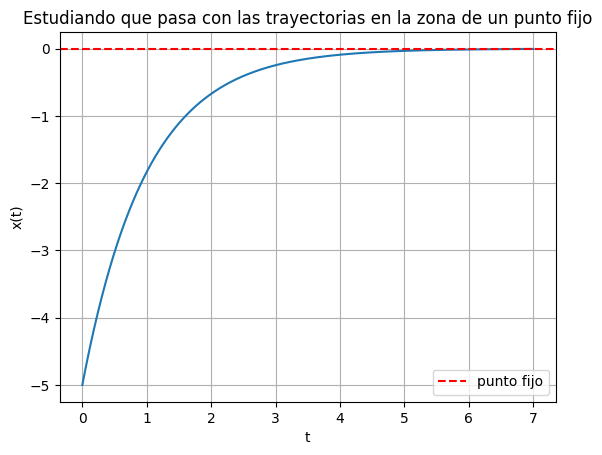

In [ ]:

# Primero pruebo con ro = -8 puesto que esta en un rango donde hay un unico punto fijo.

def euler_graficado (x0, N, deltaT, ro, a, b) :
    res = [x0]
    t = np.linspace(0, N*deltaT, N)
    for i in range (N-1) :
        siguiente_paso = res[-1] + campo(res[-1], ro)*deltaT
        res.append(siguiente_paso)
    def y(x) :
      return campo(x,ro)
    pto_fijo = biseccion2(y, a, b, 0.00001)
    plt.plot(t,res)
    plt.axhline(y=pto_fijo, color="red", linestyle='--', label="punto fijo")
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.title('Estudiando que pasa con las trayectorias en la zona de un punto fijo')

# Primero pruebo para una condicion inicial por debajo del punto fijo, x0 = -5.
euler_graficado (-5, 700, 0.01, -8, -0.2, 0.2)

En ambos casos se ve que la solucion tiende al punto fijo, esta bien porque es un punto fijo estable.


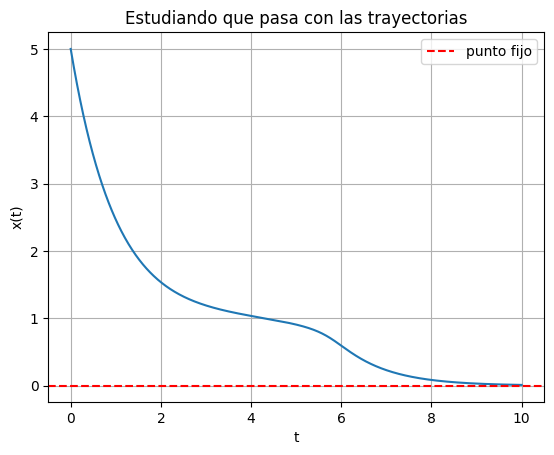

In [ ]:
# Luego pruebo para una condicion inicial por encima del punto fijo, x0 = 5.
euler_graficado (5, 1000, 0.01, -8, -0.2, 0.2)
print("En ambos casos se ve que la solucion tiende al punto fijo, esta bien porque es un punto fijo estable.")

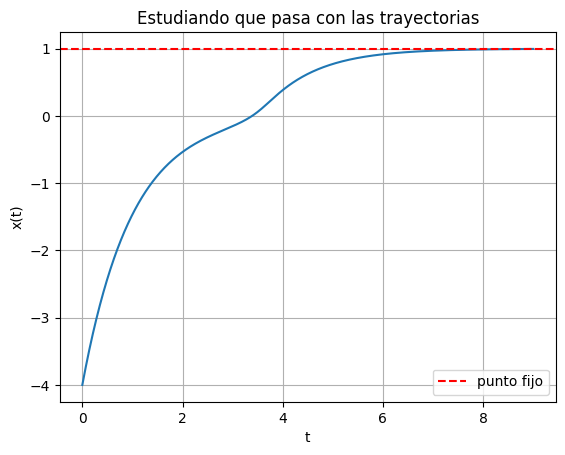

In [ ]:
# Pruebo con ro = 0 puesto que esta en la otra zona con un unico punto fijo, con condicion inicial por debajo del punto fijo, x0=-4
euler_graficado (-4, 900, 0.01, 0, 0.75, 1.25)

De nuevo en ambos casos se ve que la solucion tiende al punto fijo, esta bien porque es un punto fijo estable.


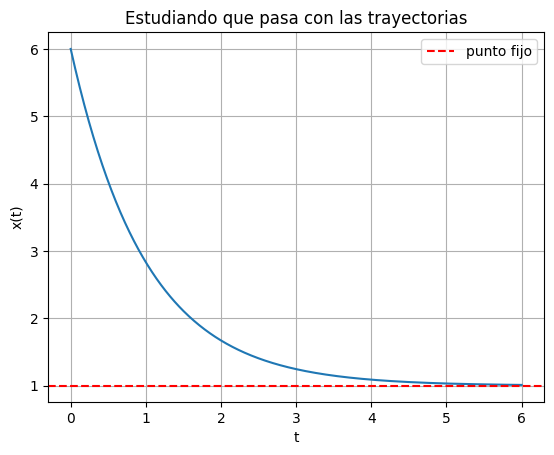

In [ ]:
# Condicion inicial por encima del punto fijo, x0 = 6
euler_graficado (6, 600, 0.01, 0, 0.75, 1.25)
print("De nuevo en ambos casos se ve que la solucion tiende al punto fijo, esta bien porque es un punto fijo estable.")

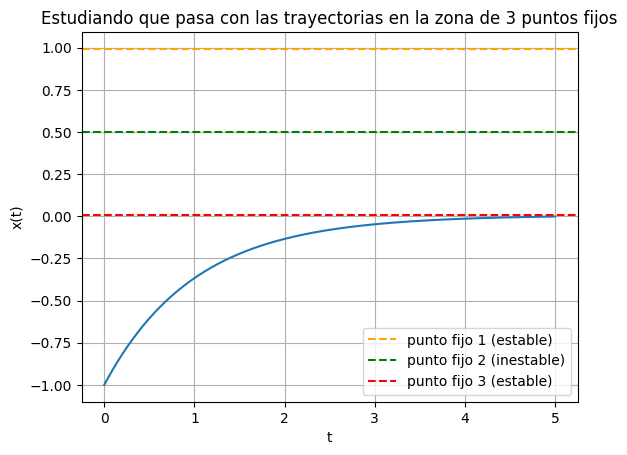

In [ ]:
# Pruebo con ro = -5 puesto que esta en la zona con 3 puntos fijos.
# Defino un nuevo euler para que grafique todos los puntos fijos, dado que no hay uno solo ya.

def euler_graficado (x0, N, deltaT, ro) :
    res = [x0]
    t = np.linspace(0, N*deltaT, N)
    for i in range (N-1) :
        siguiente_paso = res[-1] + campo(res[-1], ro)*deltaT
        res.append(siguiente_paso)
    def y(x) :
      return campo(x,ro)
    pto_fijo_1 = biseccion2(y, -0.2, 0.2, 0.00001)
    pto_fijo_2 = biseccion2(y, 0.2, 0.6, 0.00001)
    pto_fijo_3 = biseccion2(y, 0.8, 1.2, 0.00001)
    plt.plot(t,res)
    plt.axhline(y=pto_fijo_3, color="orange", linestyle='--', label="punto fijo 1 (estable)")
    plt.axhline(y=pto_fijo_2, color="green", linestyle='--', label="punto fijo 2 (inestable)")
    plt.axhline(y=pto_fijo_1, color="red", linestyle='--', label="punto fijo 3 (estable)")
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.title('Estudiando que pasa con las trayectorias en la zona de 3 puntos fijos')

# Pruebo con una conficion inicial por debajo del punto fijo estable inferior, x0 = -1
euler_graficado (-1, 500, 0.01, -5)

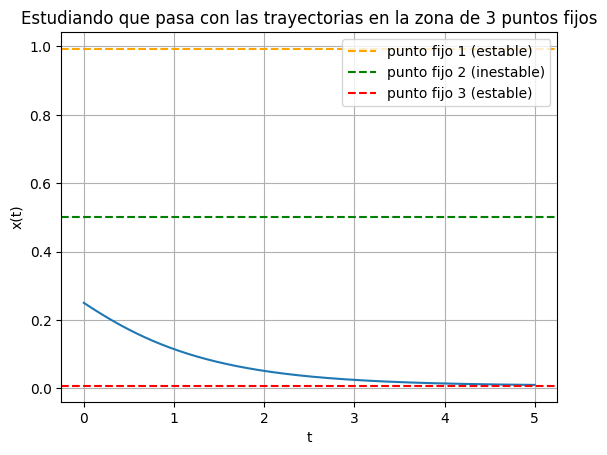

In [ ]:
# Pruebo con una conficion inicial entre el punto fijo estable inferior y el inestable, x0 = 0.25
euler_graficado (0.25, 500, 0.01, -5)

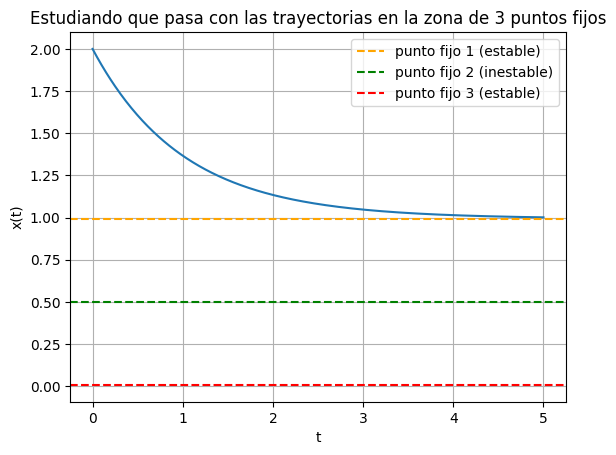

In [ ]:
# Pruebo con una conficion inicial por encima del punto fijo estable superior, x0 = 2.
euler_graficado (2, 500, 0.01, -5)

En los 4 casos al iterar la condicion inicial se aleja del punto fijo inestable y tiende al punto fijo estable pertinente.


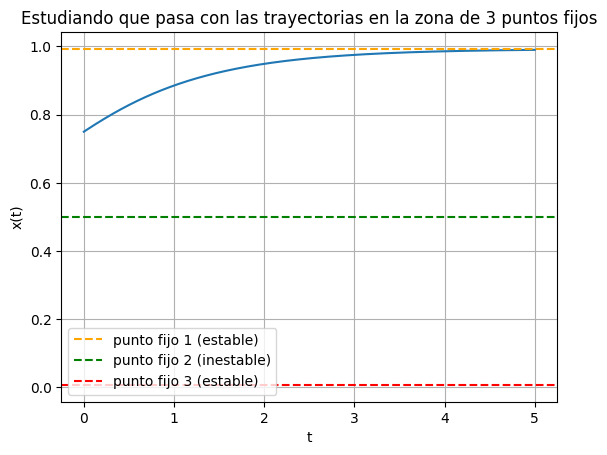

In [ ]:
# Pruebo con una conficion inicial entre el punto fijo estable superior y el inestable, x0 = 0.75
euler_graficado (0.75, 500, 0.01, -5)
print("En los 4 casos al iterar la condicion inicial se aleja del punto fijo inestable y tiende al punto fijo estable pertinente.")

La condicion inicial queda fija en el punto fijo inestable.


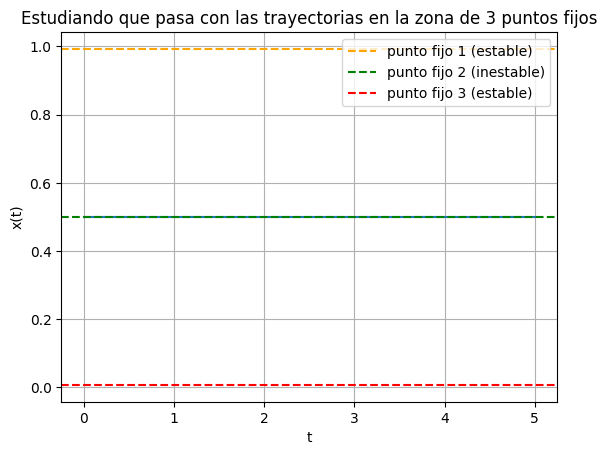

In [ ]:
# Pruebo con una condicion inicial situada en el punto fijo inestable.
euler_graficado (0.5, 500, 0.01, -5)
print("La condicion inicial queda fija en el punto fijo inestable.")

---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.

2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].

2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.

2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?

2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.

2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

##2.1

In [ ]:
def campo(t, k):
  x = k[0]
  y = k[1]
  dy = x-y
  dx = -x - x**2 - y
  return dx, dy

##2.2

In [ ]:
def ynulclina(x):
  return x
def xnulclina(x):
  return -x -x**2

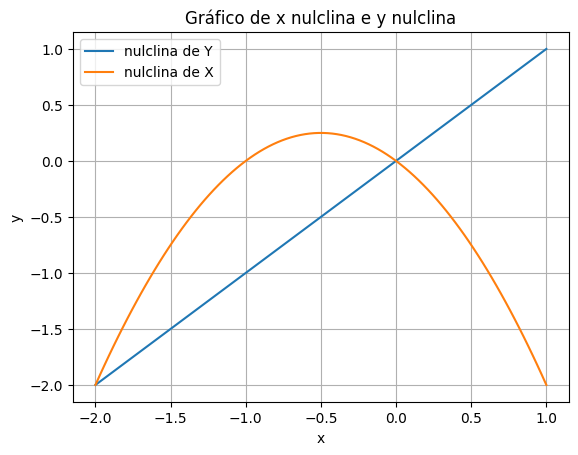

In [ ]:
x = np.linspace(-2, 1, 100)

plt.plot(x, ynulclina(x), label='nulclina de Y')
plt.plot(x, xnulclina(x), label='nulclina de X')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de x nulclina e y nulclina')
plt.grid(True)
plt.legend()
plt.show()

Podemos ver que las nulclinas se cruzan en el punto (0,0) y en el (-2,-2)

Ahora lo graficamos con contours

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
XX, YY = np.meshgrid(x, y)
DX, DY = campo(0, [XX, YY])

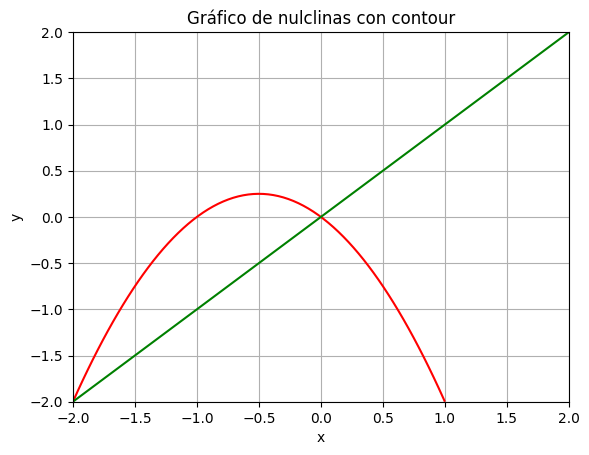

In [ ]:
c = plt.contour(XX, YY, DX, levels=[0], colors=['r'])
c = plt.contour(XX, YY, DY, levels=[0], colors=['g'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de nulclinas con contour')
plt.grid(True)
plt.show()

Con contour es más fácil dado que no hace falta que nosotros calculemos las nulclinas analíticamente

##Graficos de curioso/ansioso para entender que pasa

para entender mejor que está pasando grafico varios puntos al azar

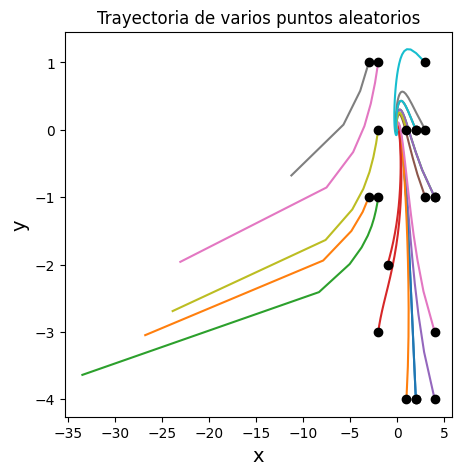

In [ ]:
dt = 0.1
tmax = 10
t = np.arange(0, tmax, dt)
X = np.random.randint(-3,5,20)
Y = np.random.randint(-4,2,20)
Z = [X,Y]
ti = t[0]

plt.figure(figsize=(5,5))
for i in range(20):
  sol = sp.integrate.solve_ivp(campo, [t[0], t[-1]], [X[i],Y[i]], t_eval=t, method='RK45')
  plt.plot(sol.y[0, :], sol.y[1, :])
  plt.plot(X[i], Y[i], 'ko')

plt.title('Trayectoria de varios puntos aleatorios')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

Graficando trazas solo podemos ver el (0,0), y que es un punto fijo atractor (por eso podemos verlo fácilmente)

##2.3

In [ ]:
def campo1(z):
   return campo(0, z)

In [ ]:
N = 10
x0s = np.random.uniform(low=-5, high=2, size=(N,))
y0s = np.random.uniform(low=-5, high=2, size=(N,))
raices = []
for x0, y0 in zip(x0s, y0s):
    z0 = [x0, y0]
    raices.append(sp.optimize.fsolve(campo1, z0))
raiz = np.unique(np.array(raices).round(2), axis=0)
print(raiz)

[[-2. -2.]
 [ 0.  0.]]


Ahora vemos que efectivamente el (0,0) es un punto fijo, y tenemos otro punto fijo que es (-2,-2)

##2.4

Analizamos la matriz jacobiana en los puntos fijos:

In [ ]:
def jacobiana(x,y):
  return np.array([[-1-2*x, -1], [1, -1]])

In [ ]:
print(jacobiana(0,0))
print(jacobiana(-2,-2))

[[-1 -1]
 [ 1 -1]]
[[ 3 -1]
 [ 1 -1]]


Buscamos Autovalores:

In [ ]:
def avals(x,y):
  return np.linalg.eig(jacobiana(x,y))

In [ ]:
print(avals(-2,-2))
print(avals(0,0))

EigResult(eigenvalues=array([ 2.73205081, -0.73205081]), eigenvectors=array([[0.96592583, 0.25881905],
       [0.25881905, 0.96592583]]))
EigResult(eigenvalues=array([-1.+1.j, -1.-1.j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]]))


Los autovalores del (-2,-2) son λ1 = 2.73 y λ2= -0.73  ---> el (-2,-2) es un punto fijo inestable.



El (0,0) tiene autovalor real doble λ = -1 ----> el (0,0) es un punto fijo estable/atractor. También sabemos que como tiene parte imaginaria va a tener forma espiral

##2.5

Grafiquemos el campo vector:

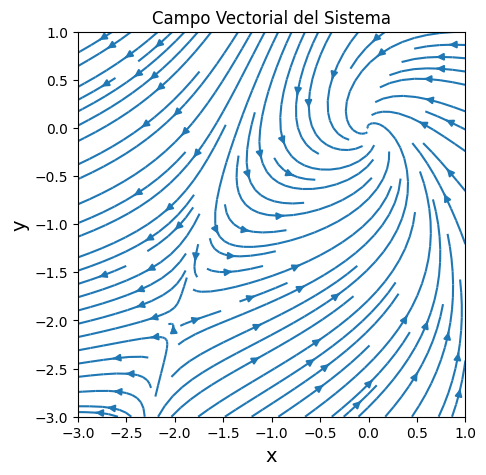

In [ ]:
x = np.linspace(-3, 1, 20)
y = np.linspace(-3, 1, 20)
X, Y = np.meshgrid(x, y)

U, V = campo(0, [X, Y])

plt.figure(figsize=(5, 5))
plt.streamplot(X, Y, U, V)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Campo Vectorial del Sistema')
plt.show()

Efectivamente el -2,-2 es un punto fijo inestable, mientras que el (0,0) es un punto foco espiral estable

##2.6

Podemos observar como pareciera que hay un eje cerca de x=-2 que divide nuestro campo en 2. Todos los puntos con por detras de ese eje divergen, mientras que todos los puntos mayores convergen en el (0,0).
De esta manera dos puntos muy cercanos a este eje pueden tener dos resultados marcadamente distintos como mostramos a continuacion:

<ipython-input-154-9f7906a54cd4>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X[i], Y[i], 'ko',color=colors[i])


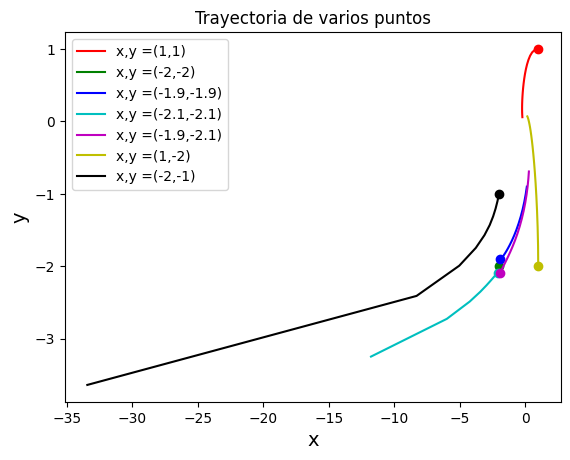

In [ ]:
dt = 0.1
tmax = 2
t = np.arange(0, tmax, dt)
X = [1,-2,-1.9,-2.1,-1.9, 1,-2]
Y = [1,-2,-1.9,-2.1,-2.1,-2,-1]
Z = [X,Y]
ti = t[0]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']


for i in range(len(X)):
  sol = sp.integrate.solve_ivp(campo, [t[0], t[-1]], [X[i],Y[i]], t_eval=t, method='RK45')
  plt.plot(sol.y[0, :], sol.y[1, :], color=colors[i], label = f'x,y =({X[i]},{Y[i]})')
  plt.plot(X[i], Y[i], 'ko',color=colors[i])



plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Trayectoria de varios puntos')
plt.legend()
plt.show()

podemos ver que si ponemos un punto en el (-2,-2) no se mueve a lo largo del tiempo pues es un punto fijo, y como puntos muy cercanos, con pequeñas perturvaciones convergen al (0,0) o divergen. Como habíamos dicho, los puntos a la derecha del (-2,-2) convergen al (0,0) mientras que los que están a la izquierda divergen.

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (calcular, no hacer a ojo). Mostrar cuál sería ese momento en la curva de I(t).

---

## 3.1


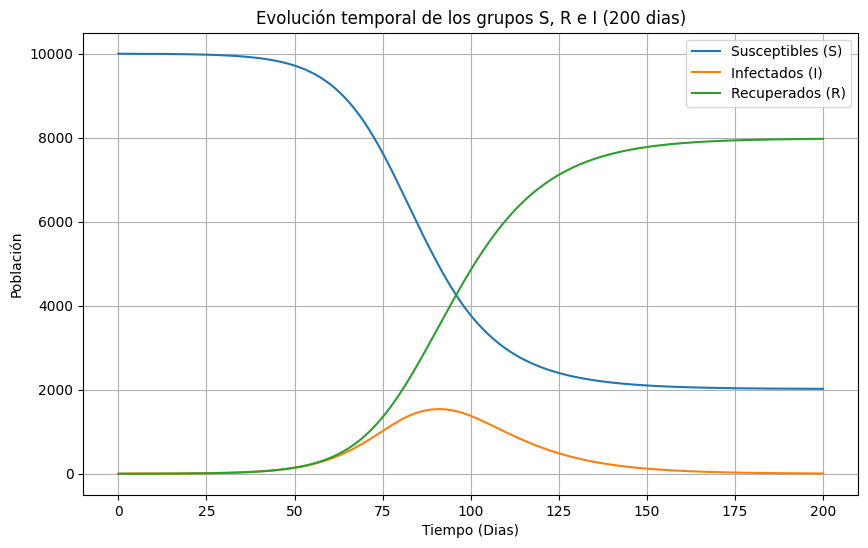

In [ ]:
#Inicializamos los parámetros
N = 10000 #Habitantes
S_0 = N-1 #Población susceptible
I_0 = 1 #Cantidad inicial de infectados
R_0 = 0 #Cantidad inicial de recuperados
beta = 0.2 #Tasa de transimisión
gamma = 1/10 #Tiempo medio de recuperación

#Definimos la funcion SIR que toma nuestras condiciones iniciales como un vector v y nos devuelve sus ODES en un vector
def SIR(t, v):
    S, I, R = v
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

#Intervalo de tiempo en el que integramos
intervalo_t = [0, 200]
t = np.linspace(intervalo_t[0], intervalo_t[1], 1000)

#Resolvemos las ODES integrando con solve_ivp
sol = sp.integrate.solve_ivp(SIR, intervalo_t, [S_0, I_0, R_0], t_eval=t)

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Susceptibles (S)')
plt.plot(sol.t, sol.y[1], label='Infectados (I)')
plt.plot(sol.t, sol.y[2], label='Recuperados (R)')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Población')
plt.legend()
plt.title('Evolución temporal de los grupos S, R e I (200 dias)')
plt.grid(True)
plt.show()

### Análisis
Graficando las soluciones del sistema de ecuaciones considerando un intervalo de tiempo de 200 dias, podemos observar como la cantidad de personas susceptibles (S) a enfermarse decae asíntoticamente hasta 2000 personas. Mientras que la cantidad de Recuperados (R) asciende asíntoticamente hasta 8000 personas. Por último podemos observar que la cantidad de personas infectadas asciende hasta alcanzar un pico cercano a las 2000 personas alrededor del dia 90 y luego decae asíntoticamente hacia 0.

A continuación veremos que pasa con la población de cada grupo si consideramos un intervalo de integración más grande de 200 días. Por ejemplo veamos que pasa con 400 dias.

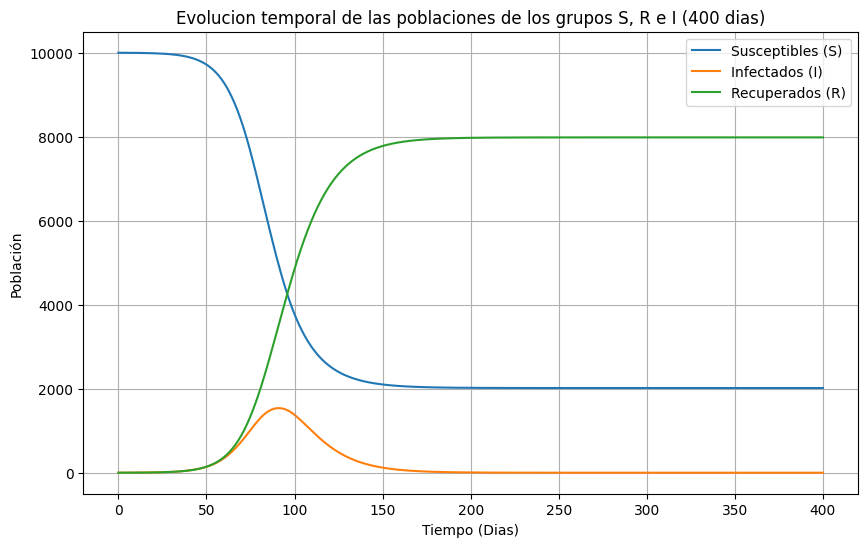

In [ ]:
#Intervalo de tiempo en el que integramos
intervalo_t = [0, 400]
t = np.linspace(intervalo_t[0], intervalo_t[1], 1000)

#Resolvemos las ODES integrando con solve_ivp
sol = sp.integrate.solve_ivp(SIR, intervalo_t, [S_0, I_0, R_0], t_eval=t)

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Susceptibles (S)')
plt.plot(sol.t, sol.y[1], label='Infectados (I)')
plt.plot(sol.t, sol.y[2], label='Recuperados (R)')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Población')
plt.title('Evolucion temporal de las poblaciones de los grupos S, R e I (400 dias)')
plt.legend()
plt.grid(True)
plt.show()

Observemos que el comportamiento observado anteriormente es el mismo y los valores de las distintas poblaciones terminan convergiendo a distintos puntos fijos y se mantienen  constantes.

## 3.2

El siguiente ejercicio nos pide verificar que la poblacion sea constante a lo largo de la simulacion para eso vamos a crear la funciòn `es_constante_en_todo_t` que verifique que la suma de las poblaciones de S, R e I sea igual a N en cada tiempo del intervalo de integracion que usamos para calcular las soluciones en el ejercicio anterior.

Est funcion toma como parametro al vector de soluciones calculado en el ejercicio anterior y devuelve True si la poblacion es constante en todo el intervalo o False si no es constante en algun tiempo t.



In [ ]:
def es_constante_en_t(s, t):
  return N == (s.y[0][t] + s.y[1][t] + s.y[2][t]) #Verificamos si la suma de cada poblacion es cte en el tiempo t

def es_constante_en_todo_t(s):
  for i in range(len(intervalo_t)):
     if es_constante_en_t(sol, i) == False:
        print(f'La poblacion no es constante en el tiempo {i}')
        return False
  print('La poblacion es constante en todo el intervalo de tiempo')
  return True

#Llamamos a la funcion que verifica que la poblacion sea cte. en todo tiempo.
es_constante_en_todo_t(sol)

La poblacion es constante en todo el intervalo de tiempo


True

## 3.3
Para ver cual es el tiempo en el cual la cantidad de infecciones llega a su maximo, vamos a realizar un análisis númerico recorriendo nuestro vector de soluciones y hallando el maximo en I(t)

In [ ]:
#Inicializamos los valores indice_max y valor_max para recorrer nuestro vector de soluciones
indice_max = 0
valor_max = sol.y[1][0]

#Recorremos el vector de soluciones y encontramos el indice en el que la funcion I(t) alcanza su valor maximo
for indice, valor in enumerate(sol.y[1]):
  if valor > valor_max:
    valor_max = valor
    indice_max = indice

tiempo_max_infectados = sol.t[indice_max] #Encontramos el tiempo en nuestra solucion

print(f"El tiempo en el que la cantidad de infecciones llega a su máximo es a los {tiempo_max_infectados:.0f} días")

El tiempo en el que la cantidad de infecciones llega a su máximo es a los 91 días


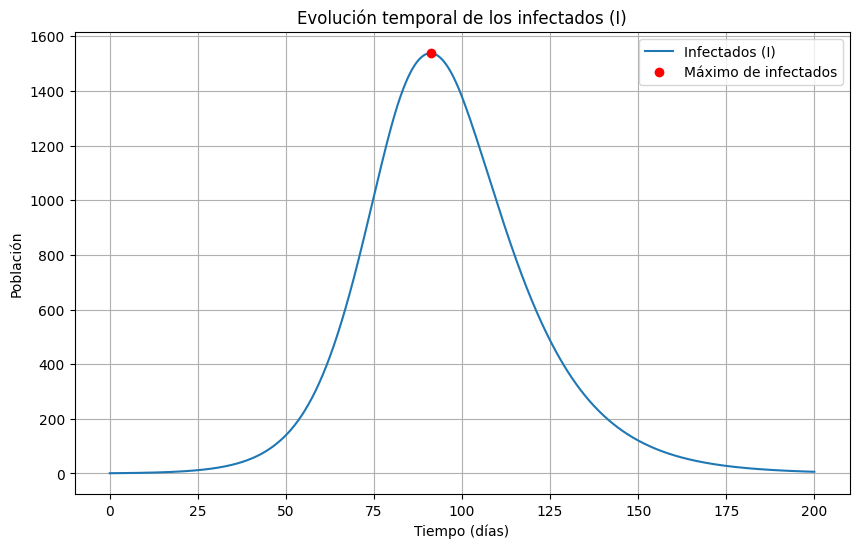

In [ ]:
# Mostramos el máximo en la curva I(t)
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[1], label='Infectados (I)')
plt.plot(tiempo_max_infectados, np.max(sol.y[1]), 'ro', label='Máximo de infectados')  # Marca el máximo con un punto rojo
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Evolución temporal de los infectados (I)')
plt.legend()
plt.grid(True)
plt.show()